In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Salary_Data.csv')
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Data Visualization

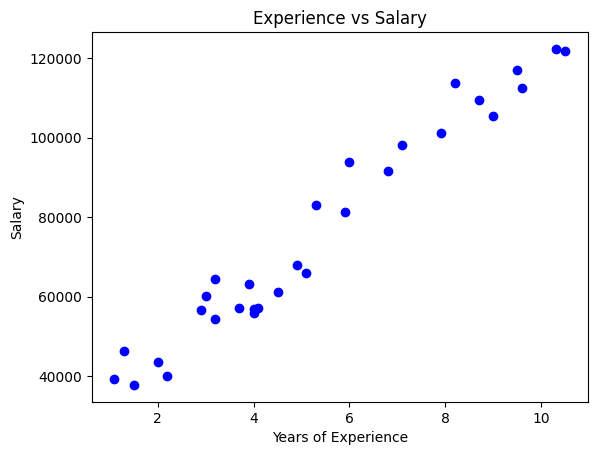

In [4]:
plt.scatter(df['YearsExperience'],df['Salary'],color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

## Data Spliting

In [5]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
from sklearn.model_selection import train_test_split    


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=101)

In [10]:
X_train.size

20

In [11]:
X_test.size

10

In [12]:
print(y_test,"-----------------------------",y_train)

[ 91738. 109431.  54445.  81363.  37731. 112635. 116969.  66029. 105582.
 122391.] ----------------------------- [ 63218.  43525.  46205.  93940. 101302.  56957.  56642.  61111.  39343.
  98273.  39891.  64445.  57081.  57189.  67938. 121872. 113812.  60150.
  83088.  55794.]


# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [14]:
# Trains the X set with y set
LR.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Predicting the values for X_test
y_pred=LR.predict(X_test) 
y_pred

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [16]:
diff_LR=y_test - y_pred
res_df=pd.concat([pd.Series(y_pred),pd.Series(y_test),pd.Series(diff_LR)],axis=1)

In [17]:
res_df.columns=['Predicted Salary','Actual Salary','Difference']
res_df

,Predicted Salary,Actual Salary,Difference
0,91477.927966,91738.0,260.072034
1,109893.228025,109431.0,-462.228025
2,56585.780487,54445.0,-2140.780487
3,82754.891096,81363.0,-1391.891096
4,40108.933066,37731.0,-2377.933066
5,118616.264895,112635.0,-5981.264895
6,117647.038576,116969.0,-678.038576
7,75001.080545,66029.0,-8972.080545
8,112800.906981,105582.0,-7218.906981
9,125400.849127,122391.0,-3009.849127


Text(0.5, 1.0, 'Salary vs Experience (Training set)')

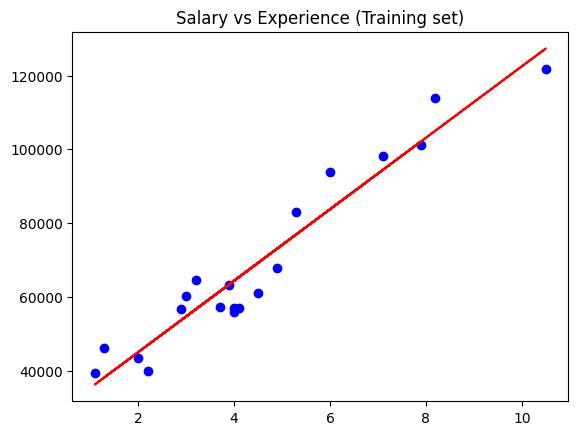

In [18]:
## Visualize the Training set results
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience (Training set)')

Text(0.5, 1.0, 'Salary vs Experience (Test set)')

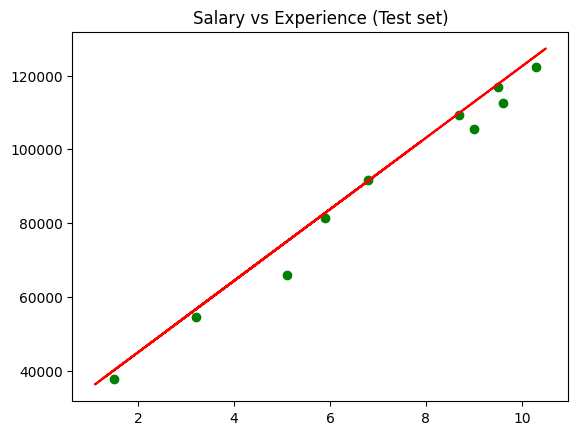

In [19]:
# Visualize the Test set results
plt.scatter(X_test,y_test,color='green')    
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience (Test set)')

# Regression Metrics

In [20]:
from sklearn import metrics
#Root Mean Square Error
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R2=metrics.r2_score(y_test,y_pred)
rmse

np.float64(4363.043260343273)

In [21]:
R2

0.974811112371526

In [22]:
# Testing with a custom input
LR.predict([[3]])

array([54647.32784875])

In [23]:
experience = min(20, X.max())
LR.predict([[experience]])


array([127339.30176442])

# Cost Function

In [25]:
x_train_flat=X_train.flatten()
y_train_flat=y_train
x_train_flat

array([ 3.9,  2. ,  1.3,  6. ,  7.9,  4. ,  2.9,  4.5,  1.1,  7.1,  2.2,
        3.2,  4.1,  3.7,  4.9, 10.5,  8.2,  3. ,  5.3,  4. ])

In [26]:
#Cost Function Calculation
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost_sum=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost_sum+=(f_wb-y[i])**2
    total_cost=cost_sum/(2*m)
    return total_cost

In [27]:
w=LR.coef_[0]
b=LR.intercept_
cost=compute_cost(x_train_flat,y_train_flat,w,b)
print("cost for trained model:",cost)

cost for trained model: 19888863.991882417


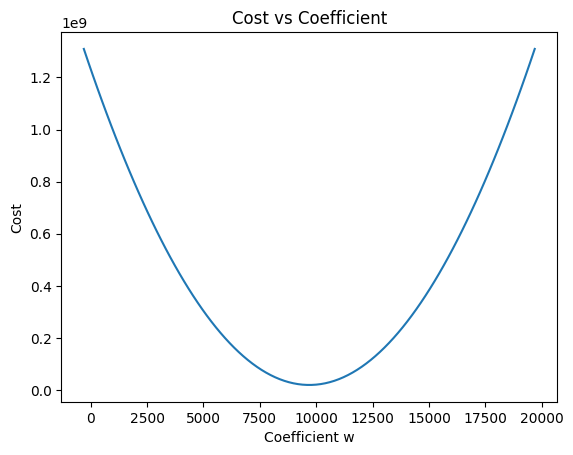

In [31]:
w_values = np.linspace(w-10000, w+10000, 100)   # vary coefficient
cost_values = [compute_cost(x_train_flat, y_train_flat, wi, b) for wi in w_values]

import matplotlib.pyplot as plt
plt.plot(w_values, cost_values)
plt.xlabel("Coefficient w")
plt.ylabel("Cost")
plt.title("Cost vs Coefficient")
plt.show()


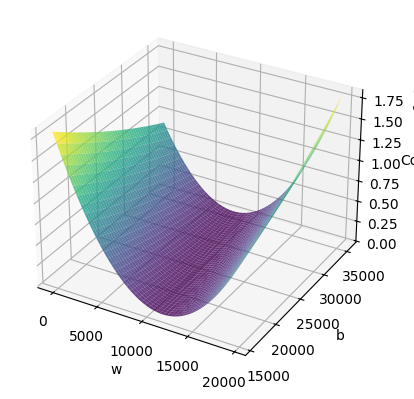

In [33]:
w_grid = np.linspace(w-10000, w+10000, 50)
b_grid = np.linspace(b-10000, b+10000, 50)
W, B = np.meshgrid(w_grid, b_grid)
Z = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i,j] = compute_cost(x_train_flat, y_train_flat, W[i,j], B[i,j])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
plt.show()
